In [1]:
import string
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
text = open('read.txt', encoding='utf-8').read()

In [4]:
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [5]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

In [6]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [7]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [21]:
emotion_list = []
with open('nrc.csv', 'r') as file:
    for line in file:
#         clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
#         word, emotion = clear_line.split(':')
        clear_line = line.replace("\n",'').strip()
        word, emotion = clear_line.split(',')

        if word in lemma_words:
            emotion_list.append(emotion)

In [22]:
print(emotion_list)
w = Counter(emotion_list)
print(w)

['anger', 'fear', 'negative', 'positive', 'trust', 'positive']
Counter({'positive': 2, 'anger': 1, 'fear': 1, 'negative': 1, 'trust': 1})


In [23]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

Neutral Sentiment


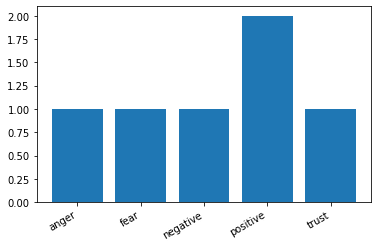

In [27]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()